In [193]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go

In [195]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv')
df.data_somministrazione = pd.to_datetime(df.data_somministrazione)

In [196]:
df.sort_values('data_somministrazione', inplace=True)

In [197]:
df.head()

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,categoria_operatori_sanitari_sociosanitari,categoria_personale_non_sanitario,categoria_ospiti_rsa,categoria_over80,prima_dose,seconda_dose
0,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,0,1,0,0,0,1,0
97,2020-12-27,Pfizer/BioNTech,PIE,60-69,94,37,113,9,9,0,131,0
98,2020-12-27,Pfizer/BioNTech,PIE,70-79,9,10,1,0,18,0,19,0
99,2020-12-27,Pfizer/BioNTech,PIE,80-89,5,19,0,0,24,0,24,0
100,2020-12-27,Pfizer/BioNTech,PIE,90+,5,15,0,0,20,0,20,0


In [198]:
df = df[df['data_somministrazione']>='2021-01-01']

In [199]:
#df.data_somministrazione = df.data_somministrazione.dt.strftime("%d-%m-%Y")

In [200]:
df['giorno_campagna'] = df.data_somministrazione.dt.dayofyear

In [201]:
df_pivot = (df.groupby(['data_somministrazione','fascia_anagrafica'])['prima_dose','seconda_dose'].sum().reset_index(level=0).
 pivot(columns='data_somministrazione', values='prima_dose').fillna(0))
df_pivot

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



data_somministrazione,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,...,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27
fascia_anagrafica,,,,,,,,,,,,,,,,,,,,,
16-19,2,18,0,12,22,37,31,43,75,143,...,57,40,25,24,23,5,5,0,3,1
20-29,903,3457,3417,5844,6732,6528,7648,8870,8762,7441,...,3693,2860,1967,1201,973,411,311,341,280,423
30-39,1946,6793,6058,11897,13525,11208,15002,15025,13281,9901,...,4807,3744,2984,1824,1387,675,393,500,446,401
40-49,2407,8303,7681,14368,16502,12776,18915,19172,16103,11452,...,6142,4592,3967,2245,1879,785,428,603,590,479
50-59,3172,10599,9998,19660,22764,17638,26305,26204,22132,15229,...,7947,5821,4979,2821,2220,1118,611,765,660,650
60-69,1671,6381,5885,11766,13931,11721,15328,15465,16555,10616,...,4548,3632,2916,1780,1348,885,366,487,490,417
70-79,183,592,527,1094,1538,1675,2209,2587,2931,2178,...,1953,1790,1589,978,740,367,162,291,311,233
80-89,279,779,596,1371,1813,1516,2931,2943,2838,1653,...,4058,3672,3065,1912,1358,611,302,646,609,488
90+,325,727,531,1266,1726,1400,2653,2552,2306,1292,...,2868,2587,2246,1492,1084,479,154,521,439,358


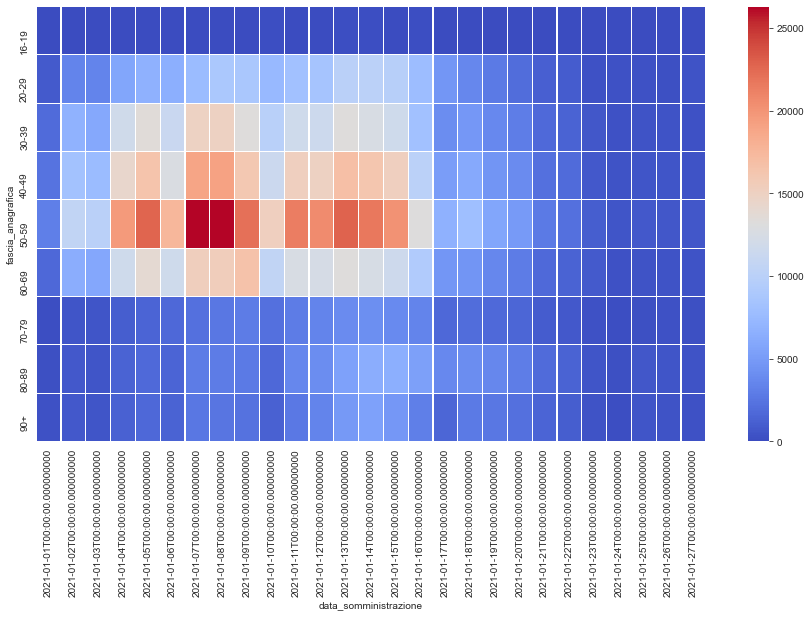

In [202]:

plt.figure(figsize=(15,8))
sns.heatmap(df_pivot, cmap='coolwarm', linecolor='white', linewidths=0.1)

In [203]:
daily = df.groupby('data_somministrazione')['prima_dose'].sum().reset_index()
df = df.merge(daily, left_on='data_somministrazione', right_on='data_somministrazione', how='inner', 
        suffixes=['','_totale_giorno'])

I need to groupby before calculating percentage as they are labelled by region as well

In [204]:
df1 = df.groupby(['data_somministrazione', 'fascia_anagrafica'])['prima_dose'].sum().reset_index(level=1).fillna(0)

In [205]:
df1 = df1.merge(daily, left_on='data_somministrazione', right_on='data_somministrazione', how='inner', 
        suffixes=['','_totale_giorno']).fillna(0)

In [206]:
df1['perc_tot_somministrati'] = (df1.prima_dose/df1.prima_dose_totale_giorno).mul(100).round(0)

In [207]:
df1.data_somministrazione = df1.data_somministrazione.dt.strftime("%d-%m-%Y")
df1_pivot = df1.pivot(columns='data_somministrazione',index='fascia_anagrafica',values='perc_tot_somministrati').sort_index(ascending=False)

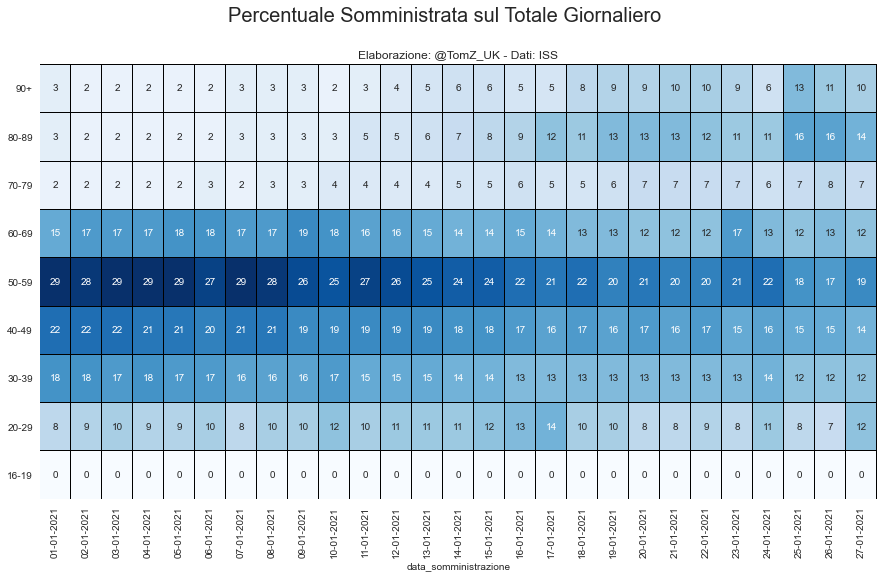

In [208]:
plt.figure(figsize=(15,8))
sns.heatmap(df1_pivot, cmap='Blues'
,annot=True, linecolor='black', linewidths=0.01, cbar=False, fmt='g')
plt.ylabel('')
plt.yticks(rotation=0, )
plt.suptitle('Percentuale Somministrata sul Totale Giornaliero', fontsize=20)
plt.title('Elaborazione: @TomZ_UK - Dati: ISS')

plt.savefig('percentuale_totale_HM.png')

# Analisi Popolazione
Percentuale somministrazioni sul totale popolazione divisa per gruppi anagrafici

In [209]:
pd.read_html('https://www.tuttitalia.it/statistiche/popolazione-eta-sesso-stato-civile-2020/')[0]


Età Celibi/Nubili Coniugati/e   Vedovi/e Divorziati/e           Maschi  \
       Età Celibi/Nubili Coniugati/e   Vedovi/e Divorziati/e           Maschi   
0      0-4     2.264.538           0          0            0   1.163.19851,4%   
1      5-9     2.627.956           0          0            0   1.352.24051,5%   
2    10-14     2.835.060           0          0            0   1.460.44951,5%   
3    15-19     2.868.948       2.004         21           83   1.485.46551,7%   
4    20-24     2.890.840      64.253        127          668   1.549.02052,4%   
5    25-29     2.714.681     407.555        630        5.628   1.605.44451,3%   
6    30-34     2.084.313   1.169.221      2.418       26.489   1.658.74950,5%   
7    35-39     1.577.289   1.915.487      7.282       72.133   1.792.98150,2%   
8    40-44     1.393.337   2.620.552     18.957      154.618   2.089.19849,9%   
9    45-49     1.211.484   3.236.400     42.592      259.289   2.356.80049,6%   
10   50-54       914.381   3.545.692     84.717      331.914   2.404.14449,3%   
11   55-59       626.453   3.439.662    147.926      323.450   2.213.00848,8%   
12   60-64       411.731   3.006.985    230.387      244.247   1.874.92248,2%   
13   65-69       286.807   2.663.542    348.074      172.591   1.652.74047,6%   
14   70-74       225.584   2.429.874    544.701      124.201   1.555.30646,8%   
15   75-79       170.300   1.701.425    701.606       70.682   1.181.23344,7%   
16   80-84       140.403   1.162.123    888.727       40.283     930.78741,7%   
17   85-89        93.445     500.696    785.500       16.983     507.80936,4%   
18   90-94        46.534     129.439    434.772        5.615     179.13029,1%   
19   95-99        13.552      16.437    129.152        1.238      35.14121,9%   
20    100+         1.556         836     12.307          105       2.33215,8%   
21  Totale    25.399.192  28.012.183  4.379.896    1.850.217  29.050.09648,7%   

            Femmine             Totale          
            Femmine Unnamed: 7_level_1       %  
0    1.101.34048,6%          2.264.538    3,8%  
1    1.275.71648,5%          2.627.956    4,4%  
2    1.374.61148,5%          2.835.060    4,8%  
3    1.385.59148,3%          2.871.056    4,8%  
4    1.406.86847,6%          2.955.888    5,0%  
5    1.523.05048,7%          3.128.494    5,2%  
6    1.623.69249,5%          3.282.441    5,5%  
7    1.779.21049,8%          3.572.191    6,0%  
8    2.098.26650,1%          4.187.464    7,0%  
9    2.392.96550,4%          4.749.765    8,0%  
10   2.472.56050,7%          4.876.704    8,2%  
11   2.324.48351,2%          4.537.491    7,6%  
12   2.018.42851,8%          3.893.350    6,5%  
13   1.818.27452,4%          3.471.014    5,8%  
14   1.769.05453,2%          3.324.360    5,6%  
15   1.462.78055,3%          2.644.013    4,4%  
16   1.300.74958,3%          2.231.536    3,7%  
17     888.81563,6%          1.396.624    2,3%  
18     437.23070,9%            616.360    1,0%  
19     125.23878,1%            160.379    0,3%  
20      12.47284,2%             14.804    0,0%  
21  30.591.39251,3%         59.641.488  100,0%

In [210]:
pop = pd.read_html('https://it.wikipedia.org/wiki/Demografia_d%27Italia', thousands='.')[11]
pop = pop[['Età', 'Totale']]
pop.drop(index=101, axis=0, inplace=True)
pop.Totale = pd.to_numeric(pop.Totale)
pop.tail()

,Età,Totale
96,96 anni,30447
97,97 anni,22450
98,98 anni,15624
99,99 anni,10192
100,100 anni e più,15080


In [211]:
pop['Età'] = pd.to_numeric(pop['Età'].str.split(' ', expand=True)[0])

In [212]:
def ages(s):
    if (s['Età'] >= 0 and s['Età'] < 16):
        return '0-16'
    elif (s['Età'] >= 16 and s['Età'] <= 19):
        return '16-19'
    elif (s['Età'] >= 20 and s['Età'] <= 29):
        return '20-29'
    elif (s['Età'] >= 30 and s['Età'] <= 39):
        return '30-39'
    elif (s['Età'] >= 40 and s['Età'] <= 49):
        return '40-49'
    elif (s['Età'] >= 50 and s['Età'] <= 59):
        return '50-59'
    elif (s['Età'] >= 60 and s['Età'] <= 69):
        return '60-69'
    elif (s['Età'] >= 70 and s['Età'] <= 79):
        return '70-79'
    elif (s['Età'] >= 80 and s['Età'] <= 89):
        return '80-89'
    elif s['Età'] >= 90:
        return '90+'

def regrouping(s):
    if s['Età'] >= 0 | s['Età'] < 16:
        return '0-16'
    elif s['Età'] >= 16 | s['Età'] <= 19:
        return '16-19'
    elif s['Età'] >= 20 | s['Età'] <= 29:
        return '20-29'
    elif s['Età'] >= 30 | s['Età'] <= 39:
        return '30-39'
    elif s['Età'] >= 40 | s['Età'] <= 49:
        return '40-49'
    elif s['Età'] >= 50 | s['Età'] <= 59:
        return '50-59'
    elif s['Età'] >= 60 | s['Età'] <= 69:
        return '60-69'
    elif s['Età'] >= 70 | s['Età'] <= 79:
        return '70-79'
    elif s['Età'] >= 80 | s['Età'] <= 89:
        return '80-89'
    elif s['Età'] >= 90:
        return '90+'

In [213]:

pop['gruppo'] = pop.apply(ages, axis=1)

In [214]:
pop

,Età,Totale,gruppo
0,0,532991,0-16
1,1,542019,0-16
2,2,553729,0-16
3,3,561994,0-16
4,4,559203,0-16
...,...,...,...
96,96,30447,90+
97,97,22450,90+
98,98,15624,90+
99,99,10192,90+


In [215]:
pop = pop.groupby('gruppo')['Totale'].sum().reset_index()
pop.gruppo = pop.gruppo.astype(str)

In [216]:
pop

,gruppo,Totale
0,0-16,8885150
1,16-19,2310358
2,20-29,6327883
3,30-39,8345554
4,40-49,9567872
5,50-59,7871829
6,60-69,6860158
7,70-79,5628974
8,80-89,3117811
9,90+,518155


In [217]:
df1 = df1.merge(pop, left_on='fascia_anagrafica', right_on='gruppo', how='inner')
df1.drop('gruppo', axis=1, inplace=True)
df1.rename(columns={'Totale':'totale_fascia'}, inplace=True)
df1.head()

,data_somministrazione,fascia_anagrafica,prima_dose,prima_dose_totale_giorno,perc_tot_somministrati,totale_fascia
0,01-01-2021,16-19,2,10888,0.0,2310358
1,02-01-2021,16-19,18,37649,0.0,2310358
2,03-01-2021,16-19,0,34693,0.0,2310358
3,04-01-2021,16-19,12,67278,0.0,2310358
4,05-01-2021,16-19,22,78553,0.0,2310358


In [218]:
df2 = (df1.groupby(['data_somministrazione','fascia_anagrafica'])['prima_dose']
 .sum().groupby(level=0).cumsum().reset_index()
.merge(pop, left_on='fascia_anagrafica', right_on='gruppo')).drop(['gruppo'], axis=1)
df2.tail()

,data_somministrazione,fascia_anagrafica,prima_dose,Totale
238,23-01-2021,90+,5336,518155
239,24-01-2021,90+,2732,518155
240,25-01-2021,90+,4154,518155
241,26-01-2021,90+,3828,518155
242,27-01-2021,90+,3450,518155


In [219]:
df_last = df1.groupby('fascia_anagrafica')[['prima_dose','totale_fascia']].agg({'prima_dose':'sum','totale_fascia':'last'}).reset_index()

In [220]:
df_last['perc_vaccinata'] = (df_last.prima_dose/df_last.totale_fascia).mul(100).round(2)

In [221]:
df_last

,fascia_anagrafica,prima_dose,totale_fascia,perc_vaccinata
0,16-19,1308,2310358,0.06
1,20-29,130973,6327883,2.07
2,30-39,195012,8345554,2.34
3,40-49,243417,9567872,2.54
4,50-59,327960,7871829,4.17
5,60-69,202660,6860158,2.95
6,70-79,47450,5628974,0.84
7,80-89,68578,3117811,2.20
8,90+,53016,518155,10.23


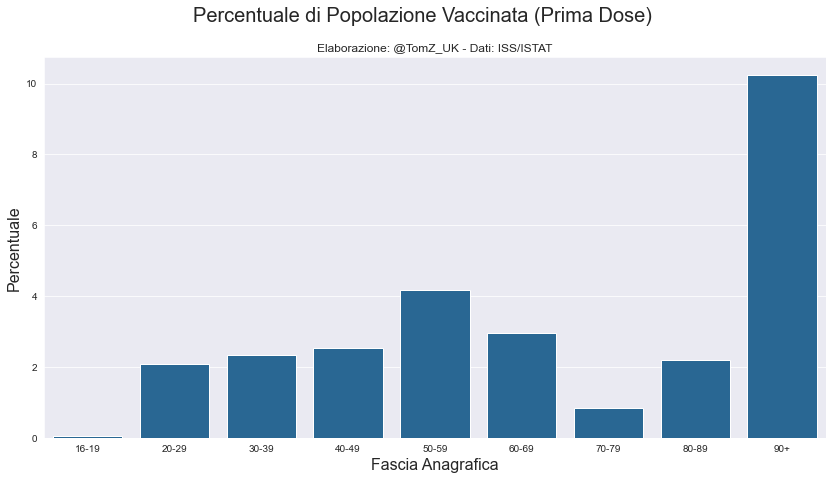

In [222]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,7))
sns.barplot(data=df_last, x='fascia_anagrafica',y='perc_vaccinata', color='#176AA5').set_title('Elaborazione: @TomZ_UK - Dati: ISS/ISTAT', fontsize=12)
plt.ylabel('Percentuale', fontsize=16)
plt.xlabel('Fascia Anagrafica', fontsize=16)
plt.suptitle('Percentuale di Popolazione Vaccinata (Prima Dose)', fontsize=20)

plt.savefig('Percentuale_Pop.png')

In [223]:
(df.prima_dose.sum() + df.seconda_dose.sum())

1563875

In [224]:
pop.drop(index=0, inplace=True)

In [225]:
((df.prima_dose.sum()/pop.Totale.sum())*100).round(2)

2.51

# Gauge Chart

In [226]:
df.groupby(df.data_somministrazione)[['prima_dose_totale_giorno','seconda_dose']].sum()

,prima_dose_totale_giorno,seconda_dose
data_somministrazione,,
2021-01-01,794824,0
2021-01-02,5233211,0
2021-01-03,4510090,0
2021-01-04,10899036,0
2021-01-05,12804139,0
2021-01-06,10900331,0
2021-01-07,15928850,0
2021-01-08,16714980,0
2021-01-09,15381923,0


df.groupby(['data_somministrazione'])['prima_dose'].sum() \
  .groupby(level=1).cumsum().reset_index()

In [227]:
df_prima = df.groupby('data_somministrazione')[['prima_dose']].sum().cumsum().reset_index()

In [228]:
pop.Totale.sum()

50548594

In [229]:
df_prima['pct_pop_prima_dose'] = (df_prima.prima_dose/pop.Totale.sum()).mul(100)

In [230]:
df_prima['daily_change'] = df_prima.pct_pop_prima_dose.diff(periods=7)

In [231]:
df_prima

,data_somministrazione,prima_dose,pct_pop_prima_dose,daily_change
0,2021-01-01,10888,0.021540,NaN
1,2021-01-02,48537,0.096020,NaN
2,2021-01-03,83230,0.164653,NaN
3,2021-01-04,150508,0.297749,NaN
4,2021-01-05,229061,0.453150,NaN
5,2021-01-06,293560,0.580748,NaN
6,2021-01-07,384582,0.760816,NaN
7,2021-01-08,477443,0.944523,0.922983
8,2021-01-09,562426,1.112644,1.016624
9,2021-01-10,622331,1.231154,1.066500


In [234]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number+delta",
    value = float(df_prima.pct_pop_prima_dose.tail(1).round(1)),
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Percentuale Popolazione Vaccinata con Prima Dose", 'font': {'size': 24}},
    delta = {'reference': float(df_prima.pct_pop_prima_dose.iloc[-1]), 'increasing': {'color': "RebeccaPurple"}},
    gauge = {
        'axis': {'range': [None, 100], 'tickwidth': 1, 'tickcolor': "darkblue"},
        'bar': {'color': "#FFBF00"},
        'bgcolor': "white",
        'borderwidth': 2,
        'bordercolor': "gray",
        'steps': [
            {'range': [0, 40], 'color': '#D6EAF8'},
            {'range': [40, 60], 'color': '#85C1E9'},
            {'range': [60, 80], 'color': '#3498DB'}],
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': 80}}))

fig.update_layout(paper_bgcolor = "lavender", font = {'color': "darkblue", 'family': "Arial"})

fig